<a href="https://colab.research.google.com/github/Gauravsaini971/Hotel-Booking-EDA-/blob/main/HotelBookingAnalysisEDA(Gaurav_Saini%2C_Hudson).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

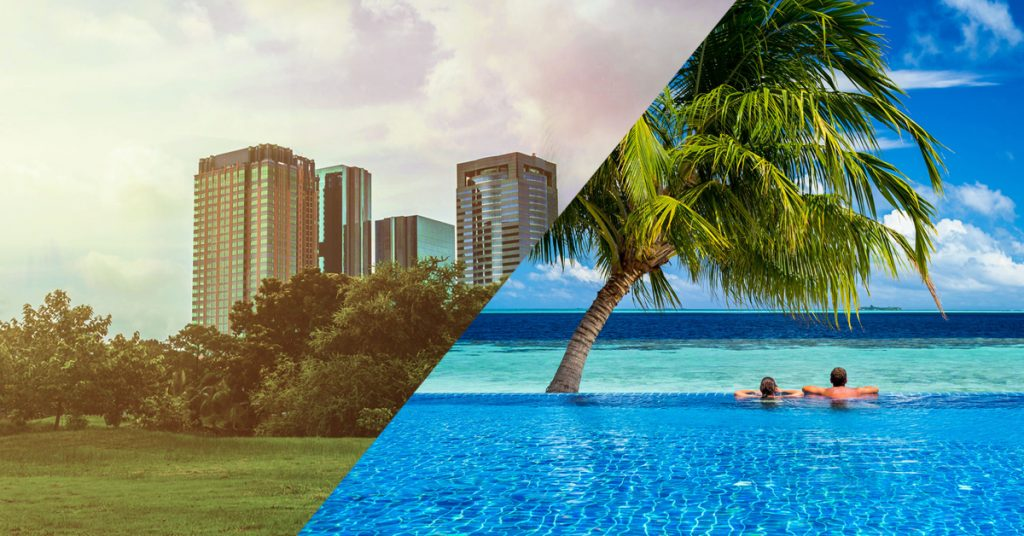

# <b> Hotel Booking Analysis

---



---



STR Global estimates that there are 187,000 hotels, offering 17.5 million guest rooms, around the globe.
Booking.com says it offers 202,842 hotels globally.
As the GDP per capita is increasing around the world, the spending on leisure activities are increasing year after year. 
According to the Hospitality Global Market Report 2022 the global hospitality market is expected to grow from 3,952.87 billion dollars in 2021 to 4,548.42 billion dollars in 2022 at a compound annual growth rate (CAGR) of 15.1%


## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b> This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

## <b> In this project we will explore and analyze the data to discover important factors that govern the bookings.





#### <b> Importing Essential Libraries

We are importing following libraries for their respective applications:




*   Numpy:- Numby is the backbone of pandas and will help in analyzing the Data Frame.
*   Pandas:- Pandas is used to analyze data. It has functions for analyzing, cleaning, exploring, and manipulating data.

*   Matplotlib, Seaborn:- Matplotlib is a graph plotting library in python that serves as a visualization utility. Most of the Matplotlib utilities lies under the pyplot submodule.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### <b> Mounting Drive & Importing Dataset Of Hotel Booking Analysis from Drive

Now, we need to load our data from the external source, which in this case is uploaded to the drive. Also we would try to spot the nature and properties of the data that we have.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_hba = pd.read_csv("/content/drive/MyDrive/Copy of Hotel Bookings.csv")

#### <b>  Data Exploration

In [4]:
# let's analyze at the first five rows of dataset.
df_hba.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# let's analyze last five rows of dataset.
df_hba.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
# Let's find out the shape of our dataset.
df_hba.shape

(119390, 32)

In [7]:
# Let's analyze a little bit about our numerical columns of our dataset.
df_hba.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# let's look at the information of various columns and find out the datatypes and total non null values of various columns.
df_hba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

There are 32 columns of three types (categorical, numerical, binary). Some columns like 'country', 'children', 'company', 'agent' have null values.

In [9]:
### Let's take a look at individual columns and try to understand them.

In [10]:
# Let's look at various types of hotel.
print((df_hba["hotel"].unique()))

['Resort Hotel' 'City Hotel']


In [11]:
# Let's dig deep a little bit in column 'is_canceled' of our dataset.
print(df_hba["is_canceled"].unique())

[0 1]


From unique values of column 'is_canceled' we can assume that 0=(Not Canceled) and 1=(Canceled).

In [12]:
# Let's explore the column 'arrival_date_year' of dataset.
print(df_hba["arrival_date_year"].unique())

[2015 2016 2017]


From the exploration of "arrival_date_year" column of dataset we can say that it has data of year [2015 2016 2017].

In [13]:
# Let's find out about various types of meals the customers prefer.
print(df_hba["meal"].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']


In [14]:
# Let's explore the column 'arrival_date_month'.
df_hba["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [15]:
# Let's explore about the nationality of the customers.
print(df_hba["country"].unique())

['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'ABW' 'AIA' 'SLV' 'DMA'

In [16]:
# Market Sagment of the hotels are
print(df_hba["market_segment"].unique())

['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


In [17]:
# Let's explore about distribution channel of the hotels.
print(df_hba["distribution_channel"].unique())

['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [18]:
# Let's explore the 'is_repeated_guest' column of the dataset.
print(df_hba["is_repeated_guest"].unique())

[0 1]


From exploration of the 'is_repeated_guests' column of dataset we can assume that 0=(Customer is not repeated) and 1=(Customer is Repeated).

In [19]:
# Let's explore the 'reserved_room_type' column of the dataset.
print(df_hba["reserved_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']


In [20]:
# Lets explore the 'assigned_room_type' column of the dataset
print(df_hba["assigned_room_type"].unique())

['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


From the exploration of columns 'reserved_room_type', 'assigned_room_type' of dataset, 
we can assume the many times the room type reserved by the customer and the room type assigned by the hotel to the customer are different 
and it may lead to booking cancelation.
We will dig deep into it during EDA analysis.

In [21]:
# Let's explore the column 'deposit_type' of dataset.
print(df_hba["deposit_type"].unique())

['No Deposit' 'Refundable' 'Non Refund']


We can look into the connection of 'deposit type' and 'cancellation'.

In [22]:
# Let's explore the 'customer_type' column of dataset.
print(df_hba["customer_type"].unique())

['Transient' 'Contract' 'Transient-Party' 'Group']


In [23]:
# Let's explore the 'reservation_status' column of dataset
print(df_hba["reservation_status"].unique())

['Check-Out' 'Canceled' 'No-Show']


**Data Description**

'''
The summary of our findings and our understandings about various columns after the data exploration of dataset is as follows:

This data in the Dataset is of hotel bookings of the year 2015, 2016 and 2017. it contains 32 columns, the discripition of the data present in the columns are as follows:

- **hotel**: Type of hotel ( City or Resort).

- **is_canceled**: Whether the booking is canceled or not (0 for not canceled and 1 for canceled).

- **lead_time**: Time in days between booking transaction and actual arrival.

- **arrival_date_year**: The year of arrival ([2015, 2016, 2017]).

- **arrival_date_month**: The month of arrival.

- **arrival_date_week_number**: The week number of the year of arrival date.

- **arrival_date_day_of_month**: The day of month of arrival date.

- **stays_in_weekend_nights**: Number of nights spent in a hotel on weekends.

- **stays_in_week_nights**: Number of nights spent in a hotel on Weekdays.

- **adults**: Number of adults in single booking record.

- **children**: Number of children in single booking record.

- **babies**: Number of babies in single booking record. 

- **meal**: Type of meal chosen [BB-Bed and Breakfast, FB- Full Board(Breakfast Lunch and Dinner), HB-Half Board(Breakfast and Dinner), SC-Self Catering]

- **country**: Country of origin of customers.

- **market_segment**: By which segment was booking  made and for what purpose [Direct, Corporate, Online TA(Travel Agents), Offline TA(Travel agents)//TO(Tour Operators), Complementary, Groups, Undefined, Aviation].

- **distribution_channel**: Via which medium booking was made(Medium type=[Direct', Corporate, TA(Travel agents)/TO(Tour Operators), Undefined, GDS]).

- **is_repeated_guest**: Whether the customer has made any booking before(0 for No and 1 for Yes).    

- **previous_cancellations**: Number of previous canceled bookings.

- **previous_bookings_not_canceled**: Number of previous non-canceled bookings.

- **reserved_room_type**: Room type reserved by a customer(Room Type=[C, A, D, E, G, F, H, L, P, B]).

- **assigned_room_type**: Room type assigned to the customer (Room Type=[C, A, D, E, G, F, H, L, P, B]).

- **booking_changes**: Number of of booking changes done by customers.

- **deposit_type**: Type of deposit at the time of making a booking (No deposit/ Refundable/ No refund).

- **agent**: Id of agent for booking.

- **company**: Id of the company making a booking.

- **days_in_waiting_list**: Number of days on waiting list.

- **customer_type**: Type of customer(Transient, Contract, Transient-Party, Group).

- **adr**: Average Daily rate=(Rooms revenue/Total rooms sold).

- **required_car_parking_spaces**: Number of car parking asked in booking.

- **total_of_special_requests**: total number of special request.

- **reservation_status**: Whether a customer has checked out or canceled,or not showed.

- **reservation_status_date**: Date of making reservation status.
'''

#### <b> Data cleaning

##### <i> 1). Handling Null Values and Duplicates.

In [24]:
# Checking for columns with Null values.
df_hba.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"}).sort_values(["null_values"], ascending = False).reset_index().drop(["index"], axis=1)[0:5]

,column_name,null_values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0


From the above exploration of columns with Null values, we can see that columns like 'agent' and 'company' has large amount of NUll values.
 We have to take care of this.

In [25]:
# Creating a copy of dataset so the original dataset will not be affected during data cleaning process
df_hba1 = df_hba.copy()

In [26]:
# Let's check the copy of our dataset
df_hba1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


From above columns we can see that the column 'company' of the dataset has large amount of null values. So we will remove the column 'company' from the dataset.

In [27]:
# Droping the column 'company' from the dataset.
df_hba1.drop(["company"], axis = 1, inplace = True)

In [28]:
# Replacing the null values in column 'children' with 0.
df_hba1["children"].fillna(0, inplace = True)

In [29]:
# Replacing the null values in column 'agent' with 0.
df_hba1["agent"].fillna(0, inplace = True)

In [30]:
# Replacing the null values in column 'country' with (other country).
df_hba1["country"].fillna("other country", inplace = True)

In [31]:
# Checking for duplicate rows in the dataset.
df_hba1.duplicated().sum()

32001

We can see that our Data Frame contains 32001 duplicate rows. So we are going to remove them.

In [32]:
# Droping the duplicate rows.
df_hba1.drop_duplicates(inplace = True)

In [33]:
# Checking if there are any duplicate rows.
df_hba1.duplicated().sum()

0

Hence all the duplicate rows have been removed.

In [34]:
# Checking if there are still any Null values in the columns of the dataset.
df_hba1.isnull().sum().reset_index().rename(columns = {"index":"column_name", 0:"null_values"})

,column_name,null_values
0,hotel,0
1,is_canceled,0
2,lead_time,0
3,arrival_date_year,0
4,arrival_date_month,0
5,arrival_date_week_number,0
6,arrival_date_day_of_month,0
7,stays_in_weekend_nights,0
8,stays_in_week_nights,0
9,adults,0


Now there are no Null values in our Data Frame.

###### <i> 2. Creating new columns. 

In [35]:
# Creating a column 'total_guests' 
df_hba1["total_guests"] = df_hba1["adults"] + df_hba1["children"] + df_hba1["babies"]

In [36]:
# Creating a columns stays_in_total_nights
df_hba1["stays_in_total_nights"] = df_hba1["stays_in_weekend_nights"] + df_hba1["stays_in_week_nights"]

In [37]:
# Checking for false bookings if any.
df_hba1[(df_hba1["total_guests"] == 0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_guests,stays_in_total_nights
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06,0.0,3
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,0.0,0,Transient,0.00,0,0,Check-Out,2015-10-12,0.0,0
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23,0.0,3
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04,0.0,5
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30,0.0,3
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01,0.0,1
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17,0.0,2
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22,0.0,7


Looks like in 166 cases the total number of guests are 0 which implies that these are false bookings or wrong entries. So we have to drop these rows for further analysis.

In [38]:
# Replacing the value 0 with Null value in 'total_guests' in order to drop the rows.
df_hba1["total_guests"].replace(to_replace = [0], value = [np.nan], inplace = True)

In [39]:
# Droping the rows containing false booking.
df_hba1.dropna(subset = ["total_guests"], inplace = True)

In [40]:
# Checking if there are any rows containing false booking left.
df_hba1["total_guests"].isnull().sum()

0

In [41]:
# Checking the shape of dataset after data cleaning.
df_hba1.shape

(87223, 33)

##### <i> 3. Essential Changes in the datatype of  columns. 

In [42]:
# Importing the datetime library.
from datetime import datetime
from datetime import date

In [43]:
# Checking the datatype of column "reservation_status_date".
type(df_hba1["reservation_status_date"][0])

str

In [44]:
# Converting the datatype of column "reservation_status_date" to timestamp.
df_hba1["reservation_status_date"] = df_hba1["reservation_status_date"].apply(lambda z: datetime.strptime(z,"%Y-%m-%d"))


In [45]:
# Checking the datatype of column "reservation_status_date" again after converting.
type(df_hba1["reservation_status_date"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
# Checking for datatypes of various columns
df_hba1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87223 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87223 non-null  object        
 1   is_canceled                     87223 non-null  int64         
 2   lead_time                       87223 non-null  int64         
 3   arrival_date_year               87223 non-null  int64         
 4   arrival_date_month              87223 non-null  object        
 5   arrival_date_week_number        87223 non-null  int64         
 6   arrival_date_day_of_month       87223 non-null  int64         
 7   stays_in_weekend_nights         87223 non-null  int64         
 8   stays_in_week_nights            87223 non-null  int64         
 9   adults                          87223 non-null  int64         
 10  children                        87223 non-null  float64       
 11  b

In [47]:
# Converting the datatype of column 'children' to int
df_hba1["children"] = df_hba1["children"].astype(int)

In [48]:
# Converting the datatype of column 'agent' to int
df_hba1["agent"] = df_hba1["agent"].astype(int)

In [49]:
# Converting the datatype of column 'total_guests' to int
df_hba1["total_guests"] = df_hba1["total_guests"].astype(int)

#### <b> Data Analysis and Visualization

Now that we know how to extract the meaningful chunk out of the huge dataset, we can proceed to analyze and visualize the data to get some insights and figure out trends and patterns over it.

##### <i> <b> Correlation Heatmap

In [50]:
# Creating the correlation heatmap.
correlation = df_hba1[["total_guests", "children", "babies", "is_canceled", "lead_time","days_in_waiting_list", "stays_in_total_nights", "adr", "required_car_parking_spaces", "arrival_date_week_number", "previous_cancellations", "previous_bookings_not_canceled", "days_in_waiting_list", "total_of_special_requests", "booking_changes"]]

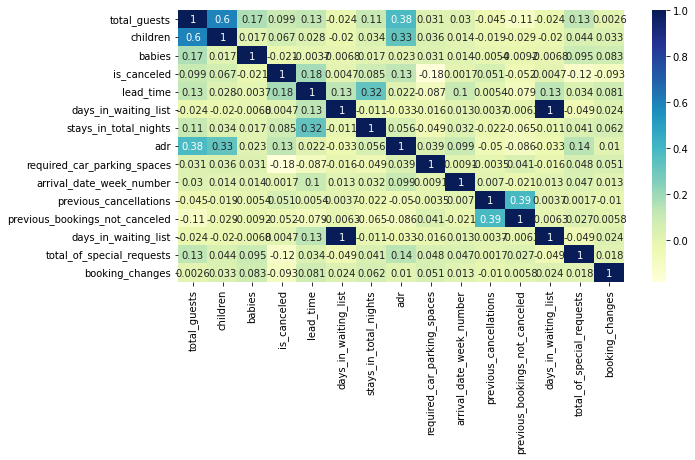

In [51]:
# Plotting the correlation heatmap.
plt.subplots(figsize=(10, 5))
sns.heatmap(correlation.corr(), cmap="YlGnBu", annot=True)



stays_in_total_nights and lead_time have slight correlation. This shows that long stays or vacations are planned way before the arrival. 
 




Are adr and stays_in_total_night coreelated?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


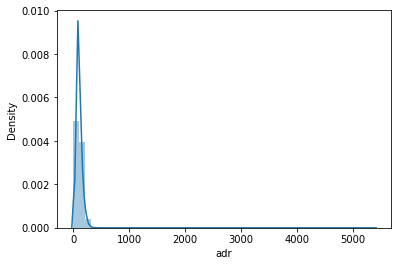

In [52]:
# Creating a distribution plot to check outliers in the column 'adr'.
sns.distplot(df_hba1["adr"], hist=True)

Text(0.5, 1.0, 'Outliers in adr')

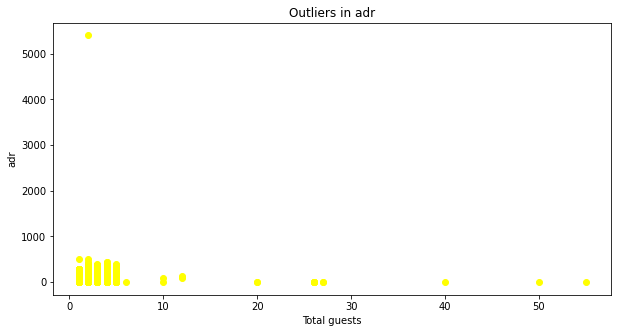

In [53]:
# Let's look if there are any outliers in adr
plt.figure(figsize = (10,5))
plt.scatter(df_hba1["total_guests"], df_hba1["adr"], c ="yellow")
plt.xlabel("Total guests")
plt.ylabel("adr")
plt.title("Outliers in adr")

We can see that the 'total guest' less than 5  and 'adr' less than 1000 are closely connected. We will consider the rest outliers and will ignore them during the analysis.

We noticed that there is an outlier in adr, so we will have to remove that.

In [54]:
# Removing the outlier of the adr. 
df_hba1.drop(df_hba1[df_hba1["adr"] > 5000].index, inplace = True)

In [55]:
# Deciding the graph size.
plt.rcParams["figure.figsize"] = (10,5)

Text(0.5, 1.0, 'Relation between total stay and adr')

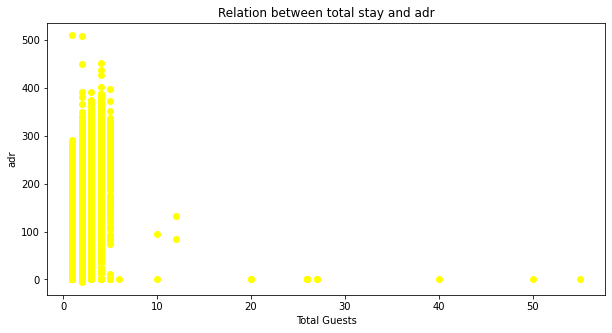

In [56]:
# Let's look at the scatter plot again after removing the outliers.
plt.scatter(df_hba1["total_guests"], df_hba1["adr"], c ="yellow")
plt.xlabel("Total Guests")
plt.ylabel("adr")
plt.title("Relation between total stay and adr")

Hence the outlier in adr is removed.

Text(0.5, 1.0, 'ADR v/s Total Number of people')

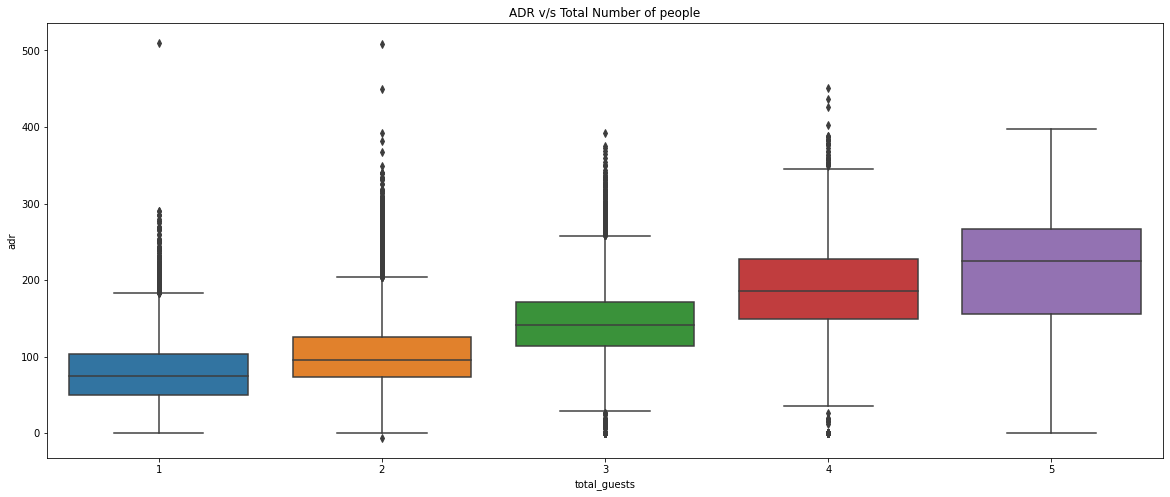

In [57]:
# Plotting the graph showing relation between adr and Total Guest.
plt.figure(figsize=(20,8))
df2=df_hba1[(df_hba1["total_guests"] > 0) & (df_hba1['total_guests'] < 6)]

sns.boxplot(x=df2['total_guests'],y=df2['adr'])

# set lables
plt.title('ADR v/s Total Number of people')

**Observation**

---



---



adr and total_people are positively correlated which is true as more number of people means more booking hence more revenue therefore more profit.

##### <i> <b> Q1. Which meal type is preferred more by guests?

In [58]:
# Creating the table of preferred meal type by the guests.
df_meal = df_hba1[df_hba1["meal"] != "Undefined"]
df_meal = df_meal.groupby(["meal"])["is_canceled"].count().reset_index().rename(columns = {"meal" : "Meal Type", "is_canceled" : "Orders"})
df_meal

,Meal Type,Orders
0,BB,67899
1,FB,360
2,HB,9080
3,SC,9391


Text(0.5, 1.0, 'Most preferred meal type by guests')

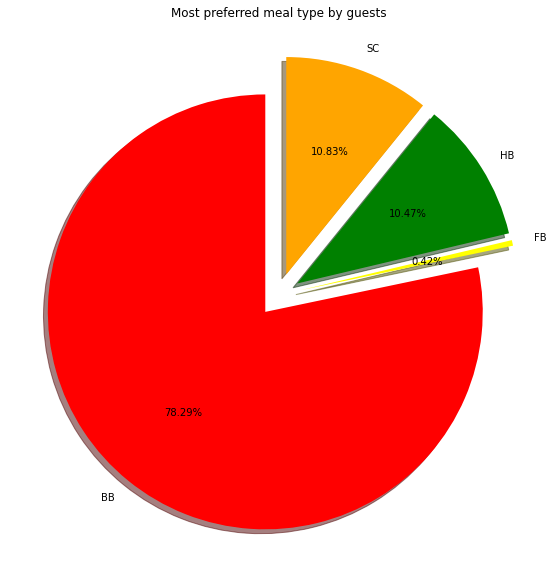

In [59]:
# Plotting the graph of above table to draw insights.
plt.figure(figsize = (15,10))
plt.pie(df_meal["Orders"],labels=df_meal["Meal Type"], colors=["Red", "Yellow", "Green", "Orange"], startangle=90, shadow=True, explode=(0.1, 0.1, 0.1, 0.1), autopct="%1.2f%%")
plt.title("Most preferred meal type by guests")

**Observation and Conclusions**

---



---



.


1.   Hence the meal type 'Bed and Breakfast' is preferred the most by the guests
2.   Hotels can increase the quality of this type of meal in order to maintain good Hospitable environment.



##### <i> <b> Q2. Which type of customers make more number of bookings?

1. Contract: When the booking has an allotment or other type of contract associated to it.

2. Group: When the booking is associated to a group.

3. Transient: When the booking is not part of a group or contract, and is not associated to other transient booking.

4. Transient-party: When the booking is transient, but is associated to at least other transient booking.



In [60]:
# Creating the table for customer types and No. of bookings.
df_customer_type = df_hba1.groupby(["customer_type"]).size().reset_index().rename(columns = {"customer_type" : "Customer Type", 0 : "No. of bookings"})
df_customer_type

,Customer Type,No. of bookings
0,Contract,3135
1,Group,541
2,Transient,71857
3,Transient-Party,11689


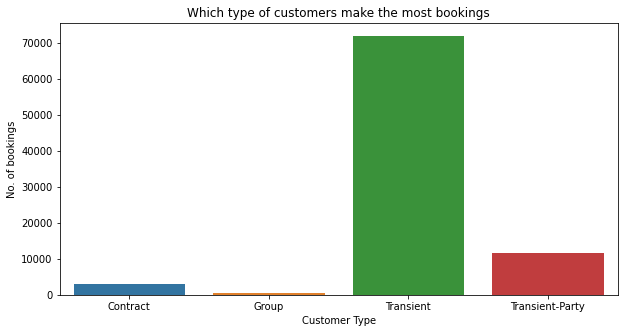

In [61]:
# Plotting the graph of the above table to take insights.
plt.title("Which type of customers make the most bookings")
sns.barplot(x = "Customer Type", y = 'No. of bookings', data = df_customer_type)
# plt.rcParams["figure.figsize"] = (10,5)

**Observations and Conclusions**

---



---



From the above table we can see that 'Transient'(Lasting or continuing for a short period of time) customer type made the most number of bookings.
   

Hotels can create ambience by keeping the Transient customer type in mind in order to make more customer retention.
Transient travellers can include:

1.   Walk-in guests
2.   Guests with a last minute booking.
3.   Simply an individual guest requiring a short stay at the hotel.

      
Tranient customers generally require 
1.    A clean and comfortable room for night.
2.    Basic amenities such as TV, telephone, Shower.
3.    Add on services like laundry and pressing etc.

Hotels can include this things in their servisces.


##### <i> <b> Q3. Which agent made the most number of bookings?


In [62]:
# Removing the value 0(we replaced in place of null during data cleaning) from the column 'agent'.
df_hba2 = df_hba1[df_hba1["agent"] != 0]

In [63]:
# Creating the table for Agent and No. of bookings.
df_agent = df_hba2.groupby(["agent"]).size().sort_values(ascending = False).reset_index().rename(columns = {"agent" : "Agent", 0 : "No. of bookings"})[0:5]
df_agent

,Agent,No. of bookings
0,9,28719
1,240,13027
2,14,3342
3,7,3294
4,250,2779


<Figure size 576x360 with 0 Axes>

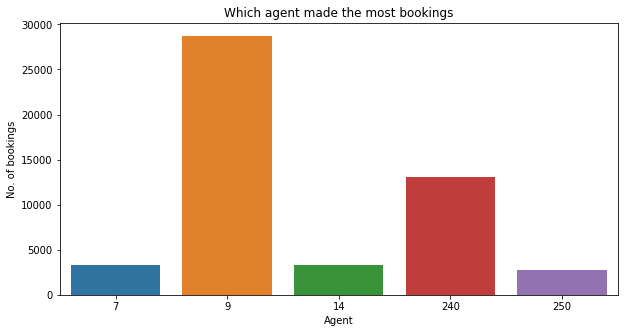

<Figure size 576x360 with 0 Axes>

In [64]:
# Plotting the graph of the above table to take insights.
plt.title("Which agent made the most bookings")
sns.barplot(x = "Agent", y = 'No. of bookings', data = df_agent)
plt.figure(figsize = (8,5))
# plt.rcParams["figure.figsize"] = (10,5)

**Observation**

---



---



From the above graph we can see that Agent ID 9 made the most number of bookings followed Agent ID 240.

##### <i> <b> Q4. Which deposit type is more preferred by customers?

In [65]:
# Creating a table for Deposit Type preferred by customers.
df_deposit_type = df_hba1.groupby(["deposit_type"]).size().reset_index().rename(columns = {"deposit_type" : "Deposit Type", 0 : "No. of customres"})
df_deposit_type

,Deposit Type,No. of customres
0,No Deposit,86078
1,Non Refund,1037
2,Refundable,107


KeyError: ignored

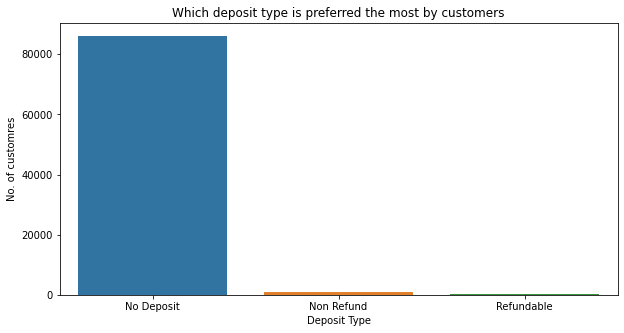

<Figure size 576x360 with 0 Axes>

In [66]:
# Plotting the graph of the above table to take insights.
plt.title("Which deposit type is preferred the most by customers")
sns.barplot(x = "Deposit Type", y = 'No. of customres', data = df_deposit_type)
plt.figure(figsize = (8,5))
plt.rcParams["Figure.figsize"] = (10,5)

**Observation and Conclusion**

---



---



1.   From above graph it is clearly visible that almost all customers preferred No Deposit type booking.
2.   Hotels can promote 'No Deposit' type bookings more as most number of customers are preferring this.
3.   Customers are preferring 'No Deposit' type bookings as it is risk free and flexible in case of booking cancellation in the future.

##### <i> <b> Q5. Which type of hotel is mostly booked by guests?

In [67]:
# Creating the table for plotting graph
df_hba1["hotel"].value_counts().reset_index().rename(columns = {"index" : "Hotel Type", "hotel" : "No. of Hotel"})


,Hotel Type,No. of Hotel
0,City Hotel,53271
1,Resort Hotel,33951


([<matplotlib.patches.Wedge at 0x7f22b6e09f90>,
 [Text(-1.1280936304856055, -0.40915126891872916, 'City Hotel'),
  Text(1.0340858279451384, 0.3750553298421683, 'Resort Hotel')],
 [Text(-0.6580546177832699, -0.23867157353592533, '61.08%'),
  Text(0.5640468152428028, 0.2045756344593645, '38.92%')])

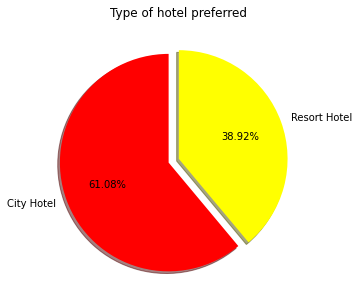

In [68]:
# Plotting the graph for above hotel
labels=list(df_hba1["hotel"].value_counts().index)
sizes=list(df_hba1["hotel"].value_counts())
colors=["red","yellow"]
plt.title("Type of hotel preferred")
plt.pie(sizes,labels=labels, colors=colors, startangle=90, shadow=True, explode=(0.1,0), autopct="%1.2f%%")

**Observation and Conclusion**

---



---



1.   Almost 60% booking are of City Hotels and 40% bookings are of Resort Hotels.
2.   As we can see that City Hotel has more bookings(almost 1.5 times) in comparison to Resort hotel.

##### <i> <b> Q6. What is relationship between Hotel Type and Total Stay?

In [69]:
# Making the table of hotel type and total stays.
not_canceled = df_hba1[df_hba1['is_canceled'] == 0]
df_hrt = not_canceled[not_canceled["stays_in_total_nights"] < 15]
df_hrt.groupby(["hotel", "stays_in_total_nights"])["stays_in_total_nights"].sum().unstack()

stays_in_total_nights,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
hotel,,,,,,,,,,,,,,,
City Hotel,0,7970,15260,27900,26092,14515,6150,8043,1560,999,780,341,360,195,364
Resort Hotel,0,6031,7802,9549,11608,8895,6672,28434,3744,3546,6580,2508,1068,897,8540


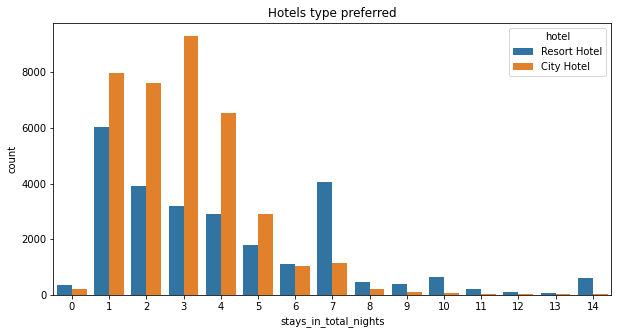

In [70]:
# Plotting the graph of above table in order to darw insights.
plt.figure(figsize = (10,5))
plt.title("Hotels type preferred")
sns.countplot(x = df_hrt['stays_in_total_nights'], hue = df_hrt['hotel'])
plt.show()
# plt.rcParams["figure.figsize"] = (10,5)

**Observation and Conclusion**

---



---




1.   Customers are preferring city hotels more for bookings of stay of less than 6 days.
2.   From the above analysis we can conclude that customers are preferring City Hotel for shorter stays(less than 6 days) & Resort Hotels are preferred for longer stays(more than or equal to 6 days).
3.   From the above graph it is clearly visible that for the stay of exactly 7, 10 or 14 days (especially 7 days) customers prefer the Resort hotels (May be for mini vacation or to celebrate functions like engagements or marriages, office success parties or other close intimate events.).




##### <i> <b> Q7. Which type of hotel generates more revenue?

In [71]:
# Finding out the revenue generated by both the hotel types.
df_revenue=df_hba1.groupby(["hotel"])["adr"].mean()
df_revenue=df_revenue.reset_index().rename(columns = {"adr" : "Revenue", "hotel" : "Hotel Type"})
df_revenue

,Hotel Type,Revenue
0,City Hotel,111.172023
1,Resort Hotel,99.064474


<Figure size 576x360 with 0 Axes>

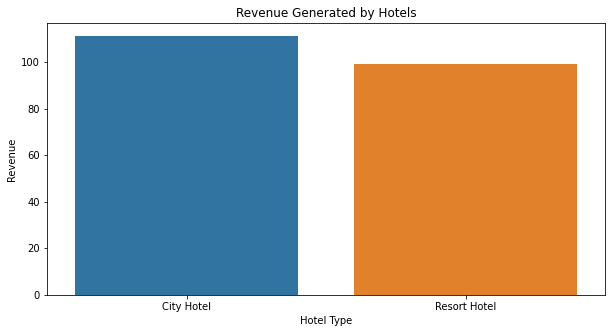

<Figure size 576x360 with 0 Axes>

In [72]:
# Plotting the graph of the above table to take insights.
plt.title("Revenue Generated by Hotels")
sns.barplot(x = "Hotel Type", y = 'Revenue', data = df_revenue)
plt.figure(figsize = (8,5))
# plt.rcParams["figure.figsize"] = (10,5)


**Observation and Conclusion**

---



---




1.   The average adr of City hotel is approx 110 and average adr of Resort hotels is around 100.
2.   From the above analysis we can conclude that City Hotels are generating more revenue in comparison to Resort Hotels.
3.   Although City Hotels are booked almost 1.5 times more than Resort Hotels, the difference in revenue of City Hotels and Resort Hotels is very less as people prefer resort hotels for longer stays and as we have assumed that Resort hotels are preferred for close intimate events which increase the revenue of the Resort Hotels.
   


##### <i> <b> Q8. Which Hotel has high lead time?

In [73]:
# Total number of on the spot bookings.
df_hba1[df_hba1["lead_time"] == 0]["lead_time"].count()

5904

In [74]:
# There were many bookings happened 6 months before the arrival.
df_hba1[df_hba1["lead_time"] > 180]["lead_time"].count()

11757

In [75]:
# As the data is lead time varies a lot we will use median of the lead time for the analysis.
# Creating the table for lead time for hotel type.
df_hlt = df_hba1.groupby(["hotel"])["lead_time"].median().reset_index().rename(columns= {"hotel" : "Hotel Type", "lead_time" : "Lead Time"})
df_hlt

,Hotel Type,Lead Time
0,City Hotel,51.0
1,Resort Hotel,47.0


<Figure size 720x360 with 0 Axes>

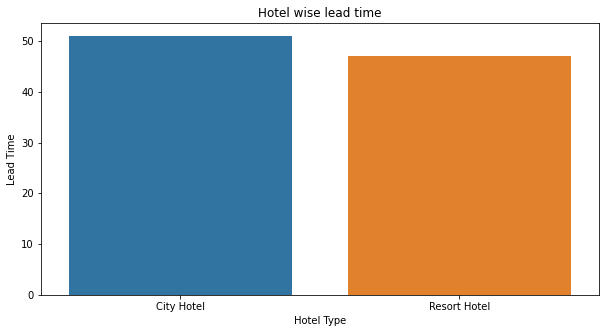

<Figure size 720x360 with 0 Axes>

In [76]:
#  Plotting the graph of above table to draw insights.
plt.title("Hotel wise lead time")
sns.barplot(x = 'Hotel Type', y = 'Lead Time', data = df_hlt)
plt.figure(figsize = (10,5))
# plt.rcParams["figure.figsize"] = (10,5)

**Observation and Conclusion**

---



---



1.   The median lead time of both the type of hotel is more or less same.
2.   There were many on the spot bookings(lead time = 0) in the data set as well as many bookings were make 6 moths in advanced to arrival.
2.   Median lead time of City hotels is slightly more than median lead time of Resort hotel ,Lead time of both type of hotels are more or less similar, so from the above graph we can conclude that customers prefer to book hotel approximately 45 days before the checkin.

##### <i> <b> Q9. Which type of hotel has higher waiting period?

In [77]:
# Creating the table for Avg waiting time for hotel type.
df_hwp = df_hba1.groupby(["hotel"])["days_in_waiting_list"].mean().reset_index().rename(columns={"hotel" : "Hotel Type", "days_in_waiting_list" : "Avg Waiting Period"})
df_hwp

,Hotel Type,Avg Waiting Period
0,City Hotel,1.020124
1,Resort Hotel,0.316810


<Figure size 720x360 with 0 Axes>

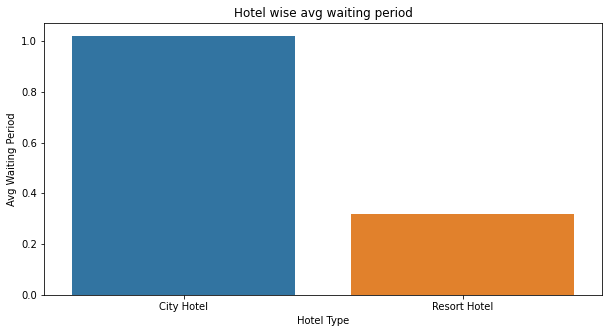

<Figure size 720x360 with 0 Axes>

In [78]:
#  Plotting the graph of above table to draw insights.
plt.title("Hotel wise avg waiting period")
sns.barplot(x = 'Hotel Type', y = 'Avg Waiting Period', data = df_hwp)
plt.figure(figsize = (10,5))

**Observation and Conclusion**

---



---



Hence we can conclude that City Hotels have more waiting period hence City hotels are much more busy in comparison to Resort Hotels.

##### <i> <b> Q10. Which type to hotel has high booking cancellation rate?

In [79]:
# Creating the table of total bookings hotelwise.
df_total_bookings = df_hba1.groupby(["hotel"])["is_canceled"].count().reset_index().rename(columns ={"hotel" : "Hotel Type", "is_canceled" : "Total Bookings"})

# Creating a table of canceled bookings hotelwise.
df_c = df_hba1[df_hba1["is_canceled"]==1]
df_canceled_bookings = df_c.groupby(["hotel"])["is_canceled"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_canceled" : "Canceled Bookings"})

# Joining the table of hotelwise total and canceled bookings.
df_hbc = pd.merge(df_total_bookings, df_canceled_bookings, how = "left", left_on = "Hotel Type", right_on ="Hotel Type")

# Adding a column of percentage canceled booking.
df_hbc["Percentage Cancellation"] = round((df_hbc["Canceled Bookings"] * 100) / df_hbc["Total Bookings"], 2)
df_hbc




,Hotel Type,Total Bookings,Canceled Bookings,Percentage Cancellation
0,City Hotel,53271,16034,30.10
1,Resort Hotel,33951,7974,23.49


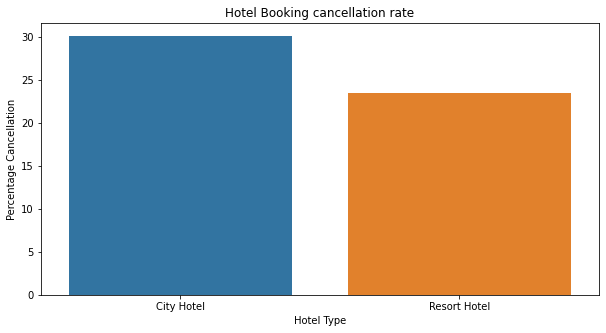

In [80]:
# Plotting the graph of the hotel booking cancellation table in order to drive the insights.
plt.title("Hotel Booking cancellation rate")
sns.barplot(x = "Hotel Type", y = 'Percentage Cancellation', data = df_hbc)
# plt.figure["figure.figsize] = (10,5)

**Observation and Conclusion**

---



---



1.   The booking cancellation rate of City hotel is approximately 30% & for Resort hotels it is approximately 24% 
2.   So from Q4, Q5, Q6 we can conclude that hotel cancellation is not related with waiting period or lead time. Thus our Correlation heatmap is relevant.
3.   City Hotels are prefered more for casual stays and Resort Hotels are prefered more for events hence cancellation is more in City Hotels.

##### <i> <b> Q11. Which hotel type has higher number of repeated guests?

In [81]:
# Creating a table for hotelwise total guests
df_total_guests = df_hba1.groupby(["hotel"])["is_repeated_guest"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_repeated_guest" : "Total Families"})

# Creating a table for hotelwise repeated guests.
df1 = df_hba1[df_hba1["is_repeated_guest"] == 1]
df_is_repeated_guest = df1.groupby(["hotel"])["is_repeated_guest"].count().reset_index().rename(columns = {"hotel" : "Hotel Type", "is_repeated_guest" : "Repeated Families"})

# Merging the above two tables.
df_repeated_guest = pd.merge(df_total_guests, df_is_repeated_guest, how = "left", left_on = "Hotel Type", right_on = "Hotel Type")
df_repeated_guest

# Adding new columns for percentage of repeated families.
df_repeated_guest["Percentage repeated families"] = round((df_repeated_guest["Repeated Families"] * 100) / df_repeated_guest["Total Families"], 2)
df_repeated_guest









,Hotel Type,Total Families,Repeated Families,Percentage repeated families
0,City Hotel,53271,1657,3.11
1,Resort Hotel,33951,1707,5.03


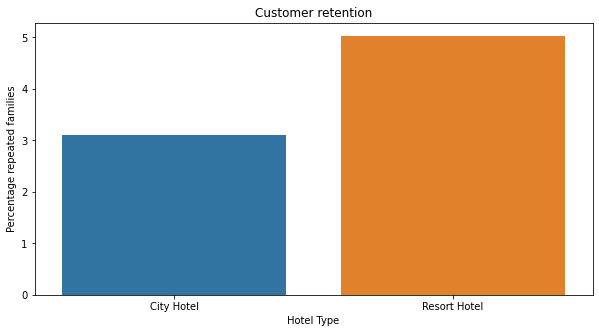

In [82]:
# Plotting the graph of the repeated families table in order to drive the insights.
plt.title("Customer retention")
sns.barplot(x = "Hotel Type", y = 'Percentage repeated families', data = df_repeated_guest)
# plt.rcParams["figure.figsize"] = (10,5)

**Observation and Conclusion**

---



---





As we can see customer retention of Resort Hotel is slightly more than City Hotel because City hotels are used more for Casual stays but the Resort hotels are more used for intimate events.




##### <i> <b> Q12. Which room type is more in demand?

In [83]:
# Creating table for most preferred room type.
df_room_type = df_hba1.groupby(["reserved_room_type"])["meal"].count().sort_values(ascending = False).reset_index().rename(columns = {"reserved_room_type" : "Room Type", "meal" : "No. of customers Preferred"})
df_room_type

,Room Type,No. of customers Preferred
0,A,56429
1,D,17376
2,E,6035
3,F,2820
4,G,2050
5,B,996
6,C,914
7,H,596
8,L,6


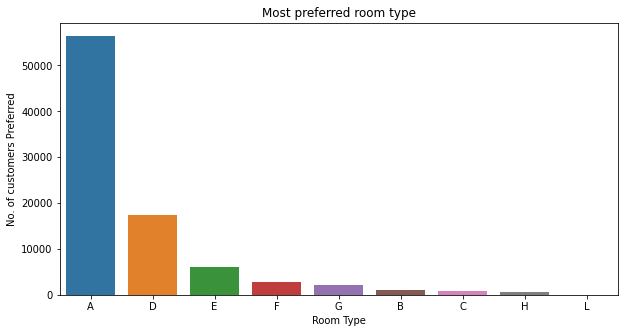

In [84]:
# Plotting the graph of above table in order to drive the insights.
plt.title("Most preferred room type")
sns.barplot(x = "Room Type", y = 'No. of customers Preferred', data = df_room_type)
# plt.rcParams["figure.figsize] = (10,5)

**Observation and Conclusion**

---



---



From the above graph it is clearly visible that customers prefer Room type 'A' the most followed by room type 'D' and room type 'E'.

##### <i> <b> Q13. Which room type generates the higher ADR?

In [85]:
# Creating the table of revenue generated bu room type.
df_room_adr = df_hba1.groupby(["assigned_room_type"])["adr"].mean().sort_values(ascending = False).reset_index().rename(columns = {"assigned_room_type" : "Room Type", "adr" : "ADR"})
df_room_adr

,Room Type,ADR
0,H,171.881530
1,G,167.546020
2,F,152.860110
3,E,119.281993
4,C,117.171481
5,D,109.135909
6,B,95.842479
7,A,95.794281
8,K,72.410919
9,I,41.264278


Text(0, 0.5, 'ADR Generated')

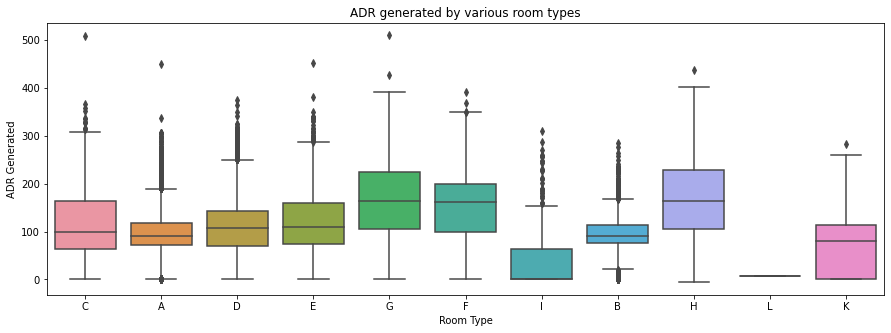

In [86]:
# Plotting the graph of above table to draw insights.
plt.rcParams["figure.figsize"] = (15,5)
sns.boxplot(x = df_hba1['assigned_room_type'], y = df_hba1['adr'])
plt.title("ADR generated by various room types")
plt.xlabel("Room Type")
plt.ylabel("ADR Generated")

**Observation and Conclusion**

---



---



1.   The Room type 'H' generates the max adr followed by room type 'G', 'F'.
2.   Room type 'H', 'G', 'F' are preferred very less by customers and yet create high adr so we can assume that they fall in luxury class and very less customers can afford it.
3.    Room type 'A' is most preferred in economy class, followed by room type 'D'.

##### <i> <b> Q14. When the hotel does not assign the room preferred by the customer, does it leads to cancellation?

In [87]:
# Creating a Data Frame including the data of customers not assigned same room as preferred.
df_hba3 = df_hba1[(df_hba1["reserved_room_type"] != df_hba1["assigned_room_type"])]
Total_Bookings = df_hba3["is_canceled"].count()

# Creating a Data Frame including the data of canceled bookings due to the abobe reason.
Canceled_Bookings = df_hba3[df_hba3["is_canceled"] == 1]["is_canceled"].count()

Bookings_not_canceled = df_hba3[df_hba3["is_canceled"] != 1]["is_canceled"].count()

Percentage_bookings_canceled = (Canceled_Bookings * 100) / Total_Bookings

Percentage_bookings_not_canceled = (Bookings_not_canceled * 100) / Total_Bookings

# Creating the Data Frame of percentage count of booking cancellation ratio due to the above reason.
df_hba4 = pd.DataFrame([Percentage_bookings_canceled, Percentage_bookings_not_canceled], index = ["Canceled", "Not Canceled"])
df_hba4 = df_hba4.reset_index().rename(columns = {"index" : "is_canceled", 0 : "Percentage Count"})
df_hba4

,is_canceled,Percentage Count
0,Canceled,4.743205
1,Not Canceled,95.256795


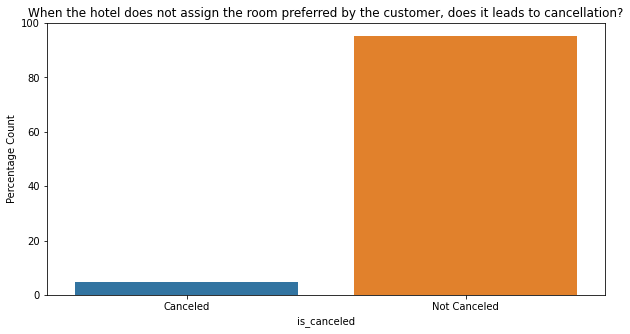

In [88]:
# Plotting the graph of above table in order to drive the insights.
plt.rcParams["figure.figsize"] = (10,5)
plt.title("When the hotel does not assign the room preferred by the customer, does it leads to cancellation?")
sns.barplot(x = "is_canceled", y = 'Percentage Count', data = df_hba4)


In [89]:
# Writing a function which returns the value "Same room Assigned" if preferred room is assigned and returns the value "Same room not Assigned" if preferred room ont assigned.
def preferred_room(a,b):
  '''
  returns the value "Same room Assigned" if preferred room is assigned and returns the value "Same room not Assigned" if preferred room ont assigned
  '''
  if a == b:
    return "Same room Assigned"
  else:
    return "Same room not assigned"

#Creating a DataFrame of Avg Adr if Same room is assigned and if Same room not assigned. 
df_hba1["preferred_room_not_alloted"] = df_hba1.apply(lambda z: preferred_room(z["reserved_room_type"], z["assigned_room_type"]), axis=1)
df_hba5 = df_hba1.groupby(["preferred_room_not_alloted"])["adr"].mean().rename(index = {0 : "Preferred room assigned", 1 : "Preferred room not assigned"}).reset_index()
df_hba5

,preferred_room_not_alloted,adr
0,Same room Assigned,110.250611
1,Same room not assigned,84.786993


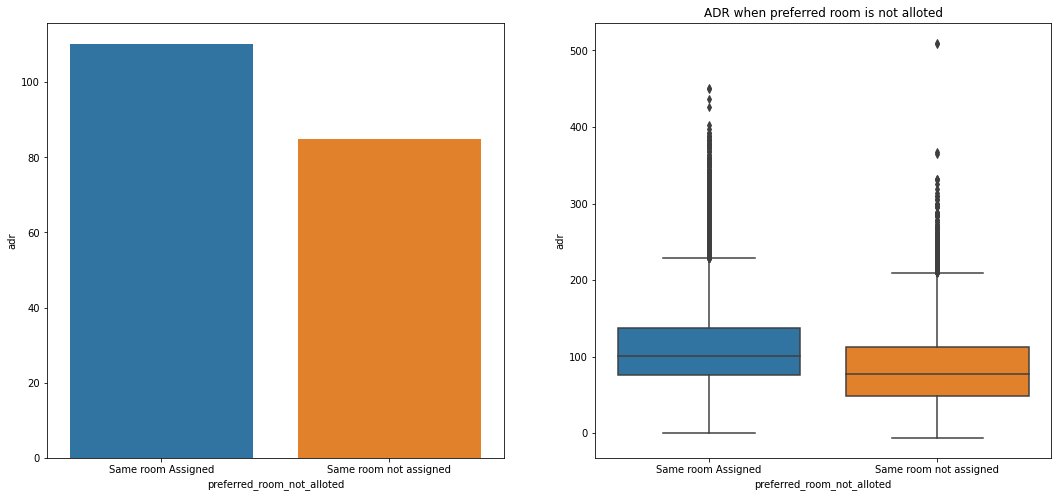

In [90]:
# Plotting the graph of above table in order to drive the insights.
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
plt.title("ADR when preferred room is not alloted")
sns.barplot(ax = axes[0], x = "preferred_room_not_alloted", y = 'adr', data = df_hba5)


# Creating a box plot for the analysis the relation of Adr and allotment of preferred room.
sns.boxplot(ax = axes[1], x = 'preferred_room_not_alloted', y = 'adr', data = df_hba1)



**Observation and Conclusion**

---



---



1.    From the above graph we can conclude that the hotel not assigning the preferred room type by customer generally doesn't leads to cancellation.
2.    But when hotels don't assign the preferred room type to customer their ADR decreases hence profit decreases.

##### <i> <b> Q15. Which distribution channel is mostly preferred by the customers?


In [91]:
# Creating the table for most preferred distribution channel.
df_hba6 = df_hba1.groupby(["distribution_channel"])["meal"].count().sort_values(ascending = False).reset_index().rename(columns = {"distribution_channel" : "Distribution Channel", "meal" : "Count"})
df_hba6

,Distribution Channel,Count
0,TA/TO,69024
1,Direct,12954
2,Corporate,5058
3,GDS,181
4,Undefined,5


<Figure size 720x360 with 0 Axes>

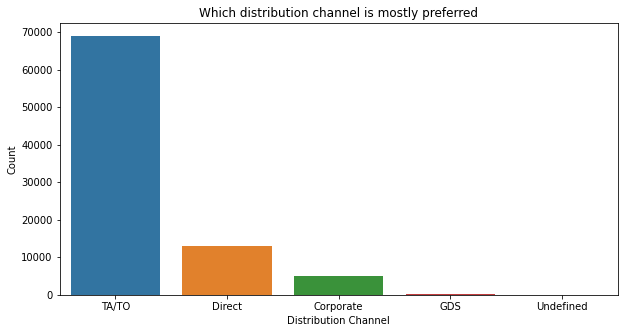

<Figure size 720x360 with 0 Axes>

In [92]:
# Plotting the graph of above table in order to drive the insights.
plt.title("Which distribution channel is mostly preferred")
sns.barplot(x = "Distribution Channel", y = 'Count', data = df_hba6)
plt.figure(figsize = (10,5))

1.    Hence we can conclude that Travel Agent and Tour operator are mostly preferred by the customers.
2.    Hotels can partner with these agents and operator or advertise using them as medium in order to increase their business.

##### <i> <b> Q16. Which Distribution channel brings more ADR?

In [93]:
# Creating the table for ADR brought by various Distribution Channel.
df_hba7 = df_hba1.groupby(["distribution_channel"])["adr"].mean().reset_index().rename(columns = {"distribution_channel" : "Distribution Channel", "adr" : "ADR"})
df_hba7

,Distribution Channel,ADR
0,Corporate,68.798573
1,Direct,109.390138
2,GDS,120.317845
3,TA/TO,108.636866
4,Undefined,46.240000


<Figure size 720x360 with 0 Axes>

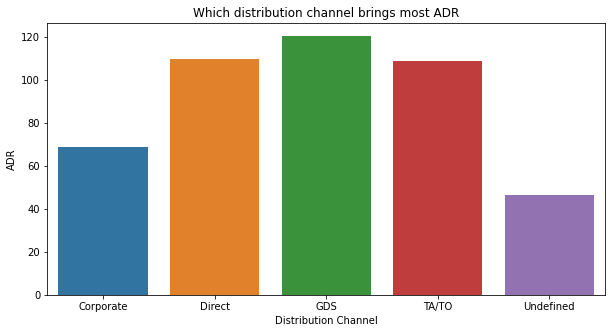

<Figure size 720x360 with 0 Axes>

In [94]:
# Plotting the graph of above table in order to drive the insights.
plt.title("Which distribution channel brings most ADR")
sns.barplot(x = "Distribution Channel", y = 'ADR', data = df_hba7)
plt.figure(figsize = (10,5))

1.   As we saw that TA/TO brings the most number of customers but the revenue generated per room is most through Global Distribution System(GDS).
2.   Hotels can think about a way to bring more customers through GDS in order to increase overall profitability.

##### <i> <b> Q17. Which year witnessed the highest number of guests?

In [95]:
# Creating a yearwise table of total number of guests.
df_yearly_guests = df_hba1.groupby(["arrival_date_year", "hotel"])["total_guests"].sum()
df_yearly_guests = df_yearly_guests.reset_index().rename(columns= {"arrival_date_year" : "Year", "total_guests" : "Guests Arrived", "hotel" : "Hotel Type"})
df_yearly_guests

,Year,Hotel Type,Guests Arrived
0,2015,City Hotel,11939
1,2015,Resort Hotel,14029
2,2016,City Hotel,54130
3,2016,Resort Hotel,31284
4,2017,City Hotel,41611
5,2017,Resort Hotel,23995


<Figure size 720x360 with 0 Axes>

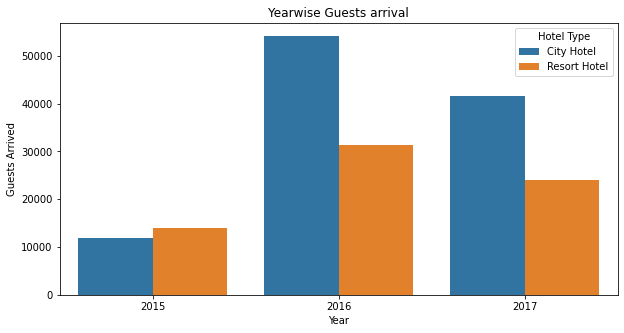

<Figure size 720x360 with 0 Axes>

In [96]:
# Plotting the graph of above table.
plt.title("Yearwise Guests arrival")
sns.barplot(x = 'Year', y = 'Guests Arrived', data = df_yearly_guests, hue = df_yearly_guests['Hotel Type'])
plt.figure(figsize = (10,5))

1.   From above analysis we can see that the year 2016 witnessed maximum number of guests followed by the year 2017.
2.   Altough the year 2015 witnessed the minimum number of guests, in the year 2015 Resort hotel type booking is more than City hotel.

##### <i> <b> Q18. What is the nationality of the guests?

In [97]:
# Finding out the nationality of the maximum number of guests.
df_nationality = df_hba1.groupby(["country"])["total_guests"].sum().sort_values(ascending = False)[:10]
df_nationality = df_nationality.reset_index().rename(columns = {"country" : "Country", "total_guests" : "Total Guests"})
df_nationality

,Country,Total Guests
0,PRT,52138
1,GBR,21383
2,FRA,18655
3,ESP,15681
4,DEU,10809
5,ITA,6503
6,IRL,6235
7,BRA,4398
8,BEL,4396
9,NLD,3906


In [98]:
# Total number of european guests.
european_guests = df_nationality["Total Guests"].sum() - df_nationality.iloc[7,1]
european_guests

139706

In [99]:
# Total number of guests in the dataset.
total_guests = df_hba1.groupby(["country"])["total_guests"].sum().sum()
total_guests

176988

In [100]:
# Finding the total number of non european guests.
total_non_european_guests = total_guests - european_guests
total_non_european_guests

37282

In [101]:
df_european_dominance = pd.DataFrame([139706, 37282], index = ["European Guests", "Guests From rest of the world"]).reset_index().rename(columns = {"index" : "Nationality", 0 : "No. of guests"})
df_european_dominance

,Nationality,No. of guests
0,European Guests,139706
1,Guests From rest of the world,37282


<Figure size 720x360 with 0 Axes>

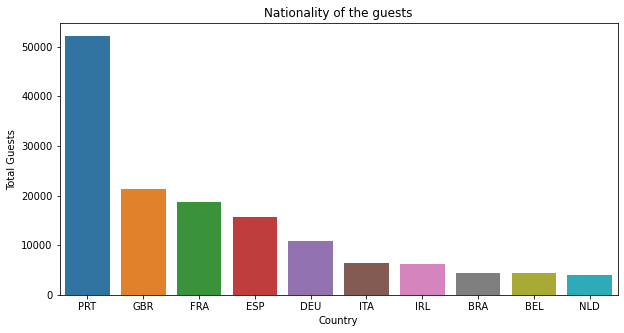

<Figure size 720x360 with 0 Axes>

In [102]:
# Plotting the graph of the nationality table in order to drive the insights.
plt.title("Nationality of the guests")
sns.barplot(x = "Country", y = 'Total Guests', data = df_nationality)
plt.figure(figsize = (10,5))

([<matplotlib.patches.Wedge at 0x7f22b49d6b50>,
 [Text(-0.7374143750116353, -0.9466889877495139, 'European Guests'),
  Text(0.6759631770939991, 0.8677982387703878, 'Guests From rest of the world')],
 [Text(-0.43015838542345386, -0.552235242853883, '78.94%'),
  Text(0.36870718750581766, 0.4733444938747569, '21.06%')])

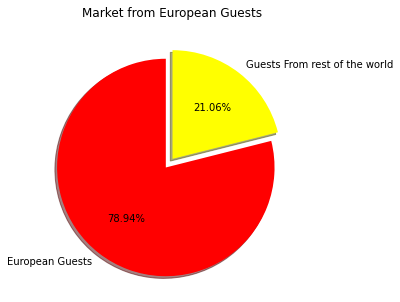

In [103]:
colors=["red","yellow"]
plt.title("Market from European Guests")
plt.pie([139706, 37282],labels = ["European Guests", "Guests From rest of the world"], colors=colors, startangle=90, shadow=True, explode=(0.1,0), autopct="%1.2f%%")



1.   From the above graph we can see that most number of guests are from PORTUGAL followed by GREAT BRITAIN and FRANCE. 
2.   9 out of 10 max guests's nationality belongs to the European countries.
3.   Out of 176990 guests 139708 guest's nationality belongs to EUROPE, which is roughly 79% of total guests. So it is safe to conclude that data in this dataset is of European hotels.







##### <i> <b> Q19. Which time of the year is best to stay in hotel?

The time of the year when the hotels are the busiest can be inferred as vacation time or the best time of the year to stay in the hotel.

In [104]:
# Creating a new column 'month' in the dataset.
df_hba1["month"]=df_hba1["reservation_status_date"].apply(lambda z: datetime.strftime(z,"%Y-%m-%d")[5:7])

In [105]:
# Preparing the table of monthwise total guests in order to plot the graph.
df_month_wise_bookings=df_hba1.groupby(["month"])["total_guests"].sum()
df_month_wise_bookings.rename(index= {"01" : "January", "02" : "February", "03" : "March", "04" : "April", "05" : "May", "06" : "June", "07" : "July", "08" : "August", "09" : "September", "10" : "October", "11" : "November", "12" : "December"}, inplace = True)
df_month_wise_bookings.reset_index()

,month,total_guests
0,January,12900
1,February,14114
2,March,15937
3,April,15975
4,May,16264
5,June,14884
6,July,19677
7,August,20923
8,September,13609
9,October,12973


Text(0, 0.5, 'No. of booking')

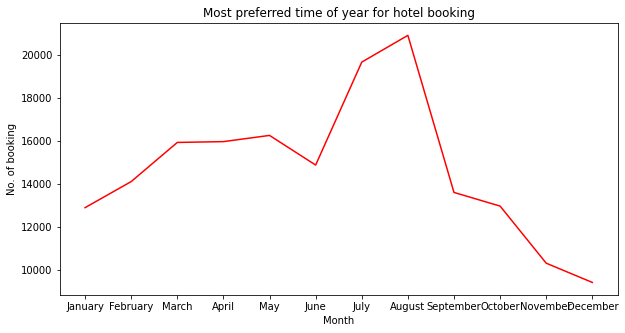

In [106]:
# Plotting the graph in order to draw insights.
plt.plot(df_month_wise_bookings, color = "red")
plt.title("Most preferred time of year for hotel booking")
plt.xlabel("Month")
plt.ylabel("No. of booking")
# plt.rcParams["figure.figsize"]=(15,5)



1.   As we can see that instead of the month of DECEMBER the total number of guests in every month are more than 10k. But from the graph there is a very clear visible spike is in the month of JULY and AUGUST, so we can conclude that the best time of the year to book a hotel is in JULY and AUGUST.
2.   The above graph further supports our assumption that the data in the dataset is of European Hotels, as during the month of JULY and AUGUST it is summers in Europe and the weather, natural sceneries and landscapes are breathtaking therefore the tourism industries boom during this period of time thus there is a clear visible spike in total number of guests during this period.
3.   The in the months of November, December, January and February there is extreme winters in Europe, therefore there is a clear visible decline in total guests during this period of time.



Now let's find out, does the above conclusion changes when the data of CITY and RESORT hotels are analyzed saperately.

In [107]:
# Preparing table for the graph plot
df_hotel_comparison=df_hba1.groupby(["month", "hotel"])["total_guests"].sum().unstack().rename(columns = {"City Hotel" : "City Hotel Guests", "Resort Hotel" : "Resort Hotel Guests"})
df_hotel_comparison.rename(index = {"01" : "January", "02" : "February", "03" : "March", "04" : "April", "05" : "May", "06" : "June", "07" : "July", "08" : "August", "09" : "September", "10" : "October", "11" : "November", "12" : "December"}, inplace = True)
df_hotel_comparison

hotel,City Hotel Guests,Resort Hotel Guests
month,,
January,7660,5240
February,8650,5464
March,10240,5697
April,10260,5715
May,10344,5920
June,9108,5776
July,11338,8339
August,12118,8805
September,8447,5162


Text(0.5, 1.0, 'Best time of the year to stay in hotel')

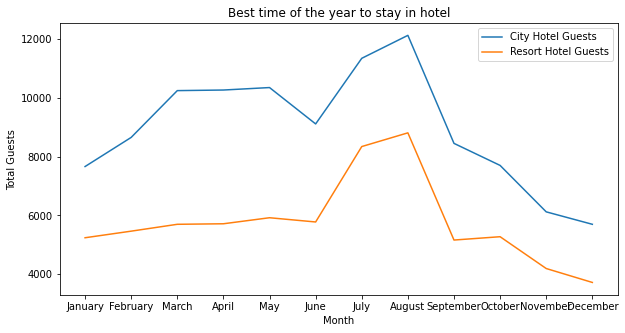

In [108]:
# Plotting the graph for the above table.
plt.plot(df_hotel_comparison)
plt.legend(["City Hotel Guests", "Resort Hotel Guests"], loc = "upper right")
plt.xlabel("Month")
plt.ylabel("Total Guests")
plt.title("Best time of the year to stay in hotel")
# plt.rcParams["figure.figsize"]=(15,5)




1.   After looking at the above graph we can say that even after analyzing the data of CITY and RESORT hotel saperately the fact that the "Best time to book an hotel is month of JULY and AUGUST" remains the same.
2.   From the above table we can also conclude that throughout the year the people prefer CITY hotels more than the RESORT hotel.



##### <b> <i> Q20. In which month of the year Revenue is the highest?

In [109]:
# Creating a graph to how the month wise 
df_monthly_adr = df_hba1.groupby(["month"])["adr"].mean().rename(index = {"01" : "January", "02" : "February", "03" : "March", "04" : "April", "05" : "May", "06" : "June", "07" : "July", "08" : "August", "09" : "September", "10" : "October", "11" : "November", "12" : "December"}).reset_index()
df_monthly_adr

,month,adr
0,January,84.670005
1,February,85.152226
2,March,90.821557
3,April,107.253571
4,May,114.710803
5,June,121.424549
6,July,132.962988
7,August,145.632408
8,September,114.198985
9,October,90.185804


In [110]:
df_hba1.replace(to_replace = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"], value = ["January", "February", "March", "April", "May", "June",  "July", "August", "September", "October", "November", "December"], inplace = True)

Text(0.5, 1.0, 'Monthly Revenue of hotels')

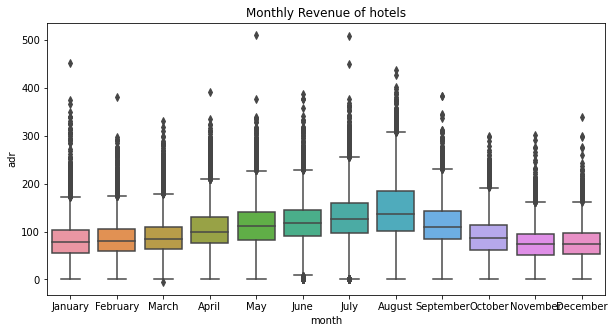

In [111]:
# Creating a box plot for the analysis the relation of Adr month of the year.
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df_hba1['month'] = pd.Categorical(df_hba1['month'], categories=reindex, ordered=True)
sns.boxplot( x = 'month', y = 'adr', data = df_hba1)
plt.title("Monthly Revenue of hotels")

The above analysis further supports our assumption that the data in the dataset is of european hotels. And as the month of June, July, August, September witness summers in the Europe, the number of bookings are more and Hotels make most profit during these months only. So we can also assume that hotels increase prices of the room during these months. And as the month of November, December, January, February witness Winters in europe The number of booking are low thus hotels reduce the prices of room during these months and their revenue also reduce.

Is there any change in Monthwise revenue when we analyze data saperately for Resort and City hotels?

In [112]:
# Creating the table for Monthly revenue of city and resort hotel.
df_hwmr = df_hba1.groupby(["hotel", "month"])["adr"].mean().unstack().transpose()
df_hwmr

hotel,City Hotel,Resort Hotel
month,,
January,95.100834,68.943026
February,97.495205,66.192805
March,101.130432,72.931812
April,118.145790,88.759334
May,127.330222,92.317647
June,121.727804,120.919050
July,121.386602,148.941397
August,122.268211,179.507092
September,117.377231,108.568475


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, 'Hotelwise monthly revenue')

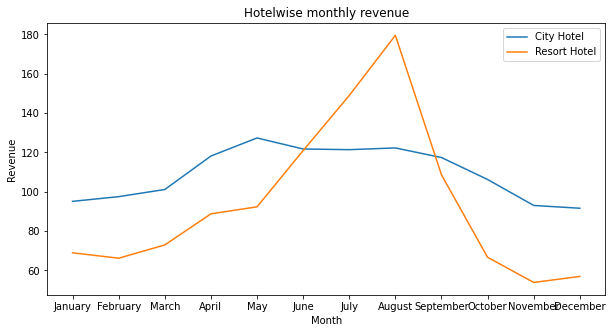

In [113]:
# Plotting the graph for the above table.
plt.plot(df_hwmr)
plt.legend(["City Hotel", "Resort Hotel"], loc = "upper right")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Hotelwise monthly revenue")
# plt.rcParams["figure.figsize"]=(15,5)


In [114]:
# Creating a table for monthwise total number single guests.
df_hba7 = df_hba1[df_hba1["total_guests"] == 1]
df_single = df_hba7.groupby(["month"]).size().reset_index().rename(columns = {"total_guests" : "Total single guests"}).rename(columns = {0 : "Total single guests"})
df_single

# Creating a table for monthwise total number couple type guests.
df_hba8 = df_hba1[df_hba1["total_guests"] == 2]
df_couple = df_hba8.groupby(["month"]).size().reset_index().rename(columns = {0 : "Total couple guests"})

# Creating a table for monthwise total number family type guests.
df_hba9 = df_hba1[df_hba1["total_guests"] > 2]
df_family = df_hba9.groupby(["month"]).size().reset_index().rename(columns = {0 : "Total family guests"})

# Merging the above three table.
df_hba10 = pd.merge(df_single, df_couple, how  = "left", left_on = "month", right_on = "month")
df_mwa = pd.merge(df_hba10, df_family, how  = "left", left_on = "month", right_on = "month")

# Viewing the final data frame
df_mwa.set_index('month', inplace=True)
df_mwa


,Total single guests,Total couple guests,Total family guests
month,,,
January,1488,4158,834
February,1432,4470,1133
March,1799,5198,1138
April,1403,5072,1349
May,1540,5524,1118
June,1256,5000,1102
July,859,5739,2228
August,797,6008,2453
September,1303,4757,844


/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0.5, 1.0, 'Monthly arrival of various type of guest')

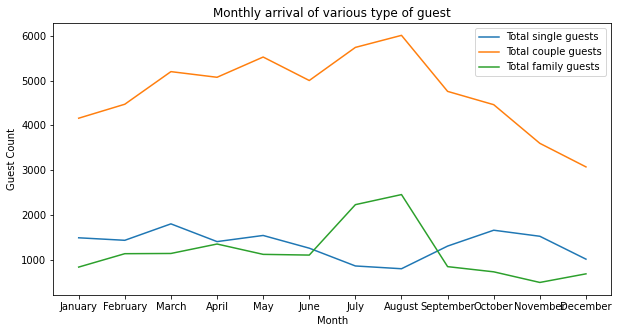

In [115]:
# Plotting the graph for the above table.
plt.plot(df_mwa)
plt.legend(["Total single guests", "Total couple guests", "Total family guests"], loc = "upper right")
plt.xlabel("Month")
plt.ylabel("Guest Count")
plt.title("Monthly arrival of various type of guest")
# plt.rcParams["figure.figsize"]=(15,5)


1.   We can observe from the above graph that during the peak months (June to September) the Resort hotel's earning of revenue is way more than City hotels( which earn more or less same throughout the year), which further proves our assumption that City hotels are booked more for Casual stays thus their price increase very less during summers, while Resort hotels are booked more for Close intimate events which happen during peak of tourism season, so the Resort hotel owner earn more during this period of time.
2.   As we can observe that most of the bookings throughout the year is made by guests of type couple(or two individual) so the hotels can devise their plans and offers keeping this in mind.
3.   The hotel booking trend of singles is opposite to the booking trend of couples and families. The number of bookings of singles reduces during the peak of the tourism season which is strange, one of the reason may be, they are travelling in a group.

##### <i> <b> Q21. What is the optimal length of stay in order to get the best daily rate?

In [116]:
# Creating the table for Total Stay and avg adr.
df_hba11 = df_hba1[(df_hba1["stays_in_total_nights"] <= 30) & (df_hba1["stays_in_total_nights"] != 0)]
df_osl = df_hba11.groupby(["stays_in_total_nights"])["adr"].mean().reset_index().rename(columns = {"stays_in_total_nights" : "Total Stays", "adr" : "Avg ADR"})
df_osl

,Total Stays,Avg ADR
0,1,96.101216
1,2,106.325130
2,3,110.941067
3,4,109.269494
4,5,114.820914
5,6,122.505017
6,7,107.525146
7,8,117.159962
8,9,116.296573
9,10,109.558647


Text(0.5, 1.0, 'Optimal length of stay in order to get the best daily rate')

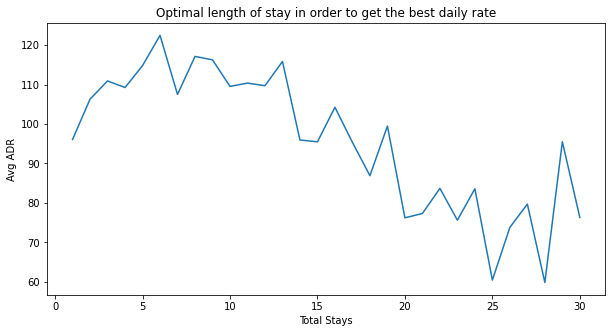

In [117]:
# Plotting the graph for the above table.
sns.lineplot(x = "Total Stays", y = "Avg ADR", data = df_osl,dashes = False, legend = "full")
plt.xlabel("Total Stays")
plt.ylabel("Avg ADR")
plt.title("Optimal length of stay in order to get the best daily rate")
# plt.rcParams["figure.figsize"]=(15,5)

####  **Hotel's Point of view**: The optimal lenght of stay to get the best daily rate is less than or equal to 2 weeks, because it is the most frequently booked lenght of stay by the customer


####  **Customer's point of view**: The optimal lenght of stay to get the best daily rate is more than 2 weeks.


##### <i> <b> Q22. What are the chances of whether or not a hotel was likely to receive a disproportionately high number of special requests?

Text(0.5, 1.0, 'Market Segment wise special requests')

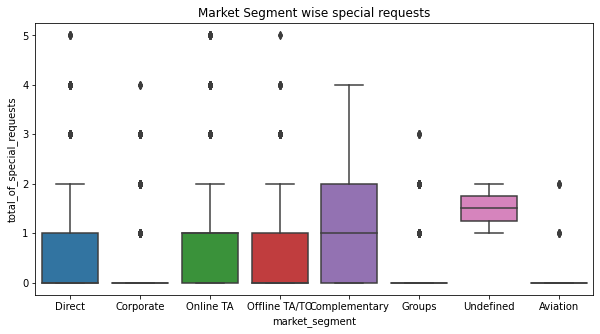

In [118]:
# Market segment wise special request count.
sns.boxplot( x = 'market_segment', y = 'total_of_special_requests', data = df_hba1)
plt.title("Market Segment wise special requests")

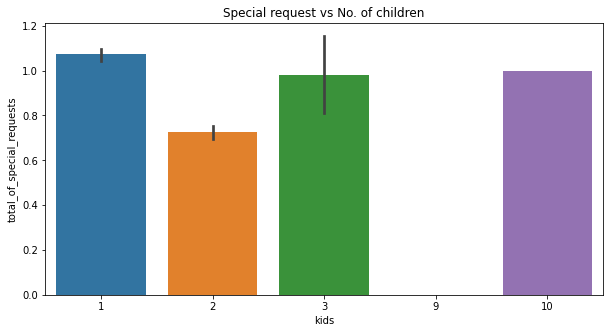

In [119]:
#Special request accoring to number of kid.
df_hba1['kids'] = df_hba1['children'] + df_hba1['babies']
df_hba11 = df_hba1[df_hba1["kids"] > 0]
sns.barplot(x="kids", y="total_of_special_requests",data= df_hba11)
plt.title("Special request vs No. of children")

fig.set_size_inches(15,10)

Text(0.5, 1.0, 'Special request vs No.of adults')

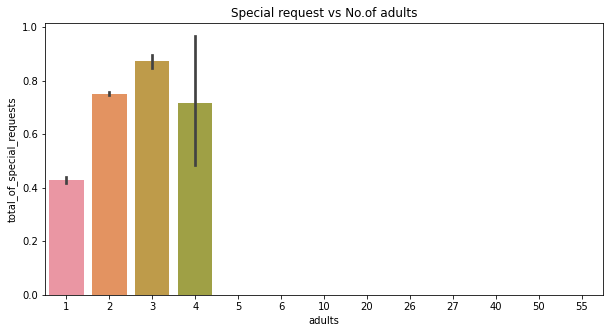

In [120]:
#Special request accoring to number of adult.
df12 = df_hba1[df_hba1["adults"] != 0]
sns.barplot(x="adults", y="total_of_special_requests",data= df12)
fig.set_size_inches(15,10)
plt.title("Special request vs No.of adults")

1.     Hotels will likely receive a disproportionately high number of special requests in the case of children among the guests and also in case of 2 to 4 adults in the group.
2.     Hotels can expect disproportionately high number of special requests from every market segments  except 'corporate', 'groups', 'aviation'.

# <b> Conclusions

From our analysis we concluded that our dataset(hotel booking details) is of european hotels and it consists of information about two type of hotel(City Hotel and Resort Hotel).

We have observed that city hotel are the most preferred/booked hotel throughout the year.The booking of the hotels will be on the peak in the month of june - sept month as in europe generally the summer are observed during the month of June - september and during this period of time the landscape and natural scenaries are breath taking and the weather is beautiful that is why the tourism industry of europe is boom in this time.


Hotels can create ambience by keeping the Transient customer type in mind in order to make more customer retention.
Transient travellers can include:

1.   Walk-in guests
2.   Guests with a last minute booking.
3.   Simply an individual guest requiring a short stay at the hotel.

      
Tranient customers generally require 
1.    A clean and comfortable room for night.
2.    Basic amenities such as TV, telephone, Shower.
3.    Add on services like laundry and pressing etc.

Hotels can include this things in their servisces.


Customers generally prefer bookings with no advanced payment, they like to pay at checkout.